In [80]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [83]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [84]:
# Seleksi Fitur

X = df.iloc[:, 3:]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


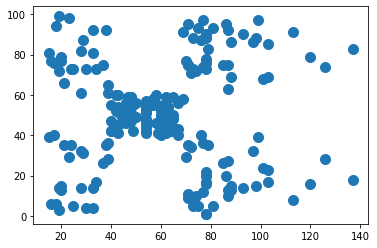

In [85]:
# Plot Data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [86]:
# Buat Model KMeans
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

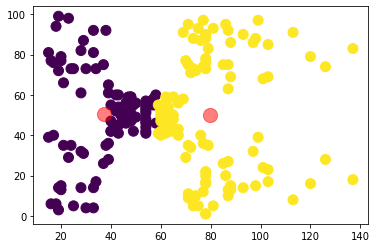

In [87]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [88]:
# Buat Model KMeans
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2)

y_kmeans = cl_kmeans.fit_predict(X)

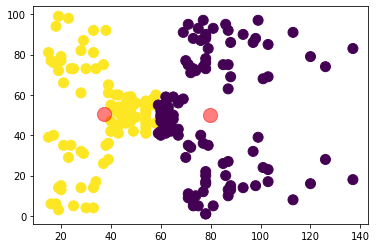

In [89]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [90]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.595959596


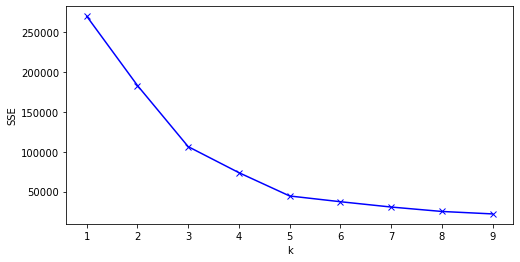

In [91]:
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

In [92]:
# Cek Nilai k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=183069.1758275129
k=3; SSE=106348.3730621112
k=4; SSE=73679.78903948834
k=5; SSE=44448.45544793371
k=6; SSE=37239.83554245604
k=7; SSE=30566.451130251855
k=8; SSE=25018.576334776335
k=9; SSE=21932.39204424098
